In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random

## Import Raw Data

In [36]:
path = r'D:\Users\hiltss\Github\Fantasy-Football'
df_gamelog = pd.read_csv(path+'\FF_League_History.csv', encoding='utf-8')

In [37]:
df_gamelog = df_gamelog.drop(['Week'],axis=1)

## Define columns

In [38]:
df_gamelog['W'] = np.where(df_gamelog['P1']>df_gamelog['P2'], 1,0)
df_gamelog['L'] = np.where(df_gamelog['P1']<df_gamelog['P2'], 1,0)
df_gamelog['T'] = np.where(df_gamelog['P1']==df_gamelog['P2'], 1,0)
df_gamelog['cumul_w'] = df_gamelog.groupby('Player')['W'].cumsum()
df_gamelog['cumul_t'] = df_gamelog.groupby('Player')['T'].cumsum()
df_gamelog['cumul_l'] = df_gamelog.groupby('Player')['L'].cumsum()
df_gamelog['cumul_wp'] = df_gamelog['cumul_w']/(df_gamelog['cumul_w']+df_gamelog['cumul_l'])
df_gamelog['cumul_games'] = df_gamelog['cumul_w']  + df_gamelog['cumul_t'] + df_gamelog['cumul_l'] 

In [39]:
df_gamelog.where(df_gamelog['two_week_flag']==0).sort_values(by=['P1'],ascending=False)

,history_week,year_week,playoff_note,postseason,two_week_flag,dupe_reverse,Year,Player,Player.1,P1,P2,W,L,T,cumul_w,cumul_t,cumul_l,cumul_wp,cumul_games
301,31.0,1.0,0,0.0,0.0,0.0,2011.0,mark silva,Karl Richardson,166.0,81.0,1.0,0.0,0.0,13.0,2.0,16.0,0.448276,31.0
634,64.0,4.0,0,0.0,0.0,0.0,2013.0,Brian Duffy,Karl Richardson,164.0,78.0,1.0,0.0,0.0,6.0,1.0,12.0,0.333333,19.0
842,83.0,8.0,0,0.0,0.0,1.0,2014.0,Robert Hilton,Stefan Hilts,161.0,81.0,1.0,0.0,0.0,11.0,0.0,12.0,0.478261,23.0
476,48.0,3.0,0,0.0,0.0,1.0,2012.0,mark silva,Dan Cohen,156.0,64.0,1.0,0.0,0.0,26.0,2.0,20.0,0.565217,48.0
608,61.0,1.0,0,0.0,0.0,1.0,2013.0,Paulo Silva,Dan Cohen,155.0,99.0,1.0,0.0,0.0,39.0,1.0,21.0,0.650000,61.0
849,84.0,9.0,0,0.0,0.0,0.0,2014.0,Andrew Joynt,Stefan Hilts,153.0,73.0,1.0,0.0,0.0,44.0,1.0,39.0,0.530120,84.0
1242,10.0,10.0,0,0.0,0.0,0.0,2016.0,Stephen Joynt,Emile Chin-Dickey,151.0,64.0,1.0,0.0,0.0,52.0,4.0,61.0,0.460177,117.0
1472,29.0,13.0,0,0.0,0.0,1.0,2017.0,Karl Richardson,Andrew Joynt,150.0,121.0,1.0,0.0,0.0,65.0,3.0,67.0,0.492424,135.0
617,62.0,2.0,0,0.0,0.0,1.0,2013.0,Dan Cohen,Brian Duffy,149.0,128.0,1.0,0.0,0.0,30.0,0.0,32.0,0.483871,62.0
347,35.0,5.0,0,0.0,0.0,1.0,2011.0,Emile Chin-Dickey,Stefan Hilts,148.0,90.0,1.0,0.0,0.0,8.0,1.0,11.0,0.421053,20.0


### WP by Player

In [6]:
select_gamelog = df_gamelog.where(df_gamelog['Year']>=2009).dropna(subset=['Year'])
select_gamelog['early_late'] = np.where(select_gamelog['year_week']<11,'early','late')
#df_results = select_gamelog.groupby(['Player','Player.1']).agg('sum')
df_results = select_gamelog.groupby(['Player']).agg('last')
df_results['wp'] = (df_results['W'] / (df_results['W'] + df_results['L'] )).round(3)
df_results['total_games'] = df_results['W']  + df_results['T'] + df_results['L'] 
df_results['Points_for_pg'] = (df_results['P1']/df_results['total_games']).round(1)
df_results['Points_against_pg'] = (df_results['P2']/df_results['total_games']).round(1)
df_results['pt_diff'] = df_results['Points_for_pg']-df_results['Points_against_pg']

pd.set_option('display.max_rows', 500)
df_results = df_results.iloc[:,6:]
df_results


,Year,Player.1,P1,P2,W,L,T,cumul_w,cumul_t,cumul_l,cumul_wp,cumul_games,early_late,wp,total_games,Points_for_pg,Points_against_pg,pt_diff
Player,,,,,,,,,,,,,,,,,,
Andrew Joynt,2017,Rafesse,88,106,0,1,0,74,2,63,0.540146,139,late,0.0,1,88.0,106.0,-18.0
Brian Duffy,2015,Rafesse,48,74,0,1,0,21,3,38,0.355932,62,late,0.0,1,48.0,74.0,-26.0
Dan Cohen,2017,William Schager,100,72,1,0,0,74,0,65,0.532374,139,late,1.0,1,100.0,72.0,28.0
Emile Chin-Dickey,2015,Bye,91,91,0,0,1,49,2,73,0.401639,124,late,NaN,1,91.0,91.0,0.0
Greg Smith,2017,Paulo Silva,65,97,0,1,0,14,1,17,0.451613,32,late,0.0,1,65.0,97.0,-32.0
Karl Richardson,2016,Bye,109,109,0,0,1,66,5,68,0.492537,139,late,NaN,1,109.0,109.0,0.0
Paulo Silva,2017,Greg Smith,97,65,1,0,0,76,2,61,0.554745,139,late,1.0,1,97.0,65.0,32.0
Rafesse,2016,Bye,56,56,0,0,1,26,2,36,0.419355,64,late,NaN,1,56.0,56.0,0.0
Robert Hilton,2014,Bye,84,84,0,0,1,37,1,41,0.474359,79,late,NaN,1,84.0,84.0,0.0


### Running total win percentage by player

In [7]:
player_list = df_gamelog.groupby('Player')['Player'].agg('count').index
df_cumul_wp = pd.DataFrame()

for player in player_list:
    player_iter = player
    df_temp = df_gamelog.where(df_gamelog['Player']==player_iter)[['cumul_wp','cumul_games']].dropna().set_index('cumul_games').sort_index()
    #df_temp = df_gamelog.where(df_gamelog['Player']==player_iter)[['cumul_wp']].dropna().sort_index()
    df_cumul_wp = df_cumul_wp.join(df_temp, how='outer', rsuffix=player)

df_cumul_wp

,cumul_wp,cumul_wpBrian Duffy,cumul_wpDan Cohen,cumul_wpEmile Chin-Dickey,cumul_wpGreg Smith,cumul_wpKarl Richardson,cumul_wpPaulo Silva,cumul_wpRafesse,cumul_wpRobert Hilton,cumul_wpStefan Hilts,cumul_wpStephen Joynt,cumul_wpWilliam Schager,cumul_wpchris tingle,cumul_wpmark silva
cumul_games,,,,,,,,,,,,,,
1.0,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,NaN,0.000000,1.000000,0.000000
2.0,0.000000,0.500000,0.500000,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,0.000000,0.500000,0.500000,0.500000
3.0,0.500000,0.333333,0.666667,0.000000,0.500000,0.666667,0.666667,0.333333,0.333333,0.666667,0.500000,0.333333,0.333333,0.333333
4.0,0.333333,0.500000,0.500000,0.000000,0.666667,0.500000,0.750000,0.500000,0.250000,0.750000,0.666667,0.500000,0.250000,0.500000
5.0,0.250000,0.400000,0.600000,0.000000,0.750000,0.600000,0.600000,0.400000,0.200000,0.800000,0.500000,0.600000,0.200000,0.600000
6.0,0.200000,0.333333,0.666667,0.000000,0.600000,0.500000,0.500000,0.500000,0.333333,0.833333,0.600000,0.500000,0.166667,0.666667
7.0,0.166667,0.285714,0.714286,0.166667,0.500000,0.571429,0.571429,0.571429,0.428571,0.857143,0.500000,0.428571,0.142857,0.571429
8.0,0.285714,0.250000,0.625000,0.142857,0.571429,0.625000,0.625000,0.500000,0.500000,0.750000,0.428571,0.500000,0.125000,0.500000
9.0,0.250000,0.222222,0.666667,0.250000,0.500000,0.666667,0.666667,0.555556,0.444444,0.777778,0.375000,0.444444,0.222222,0.444444


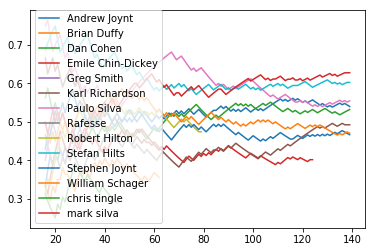

In [8]:
df_cumul_wp.columns = player_list
df_cumul_wp.iloc[15:]
lineObjects = plt.plot(df_cumul_wp.iloc[15:])
plt.legend(lineObjects, [x for x in player_list], loc='lower left')
#plt.legend(loc='lower left')
plt.show()






## Random Scheduling Module
1. Randomize the schedules by season to test who wins in a different setup
2. Run a bunch of seasons! 

#### 10-team first (2009-2013 seasons)
- 10 teams
- 13 Regular-season games
- 4 playoff teams (no byes), 2 week playoffs

#### 12-Team (2014-2017)
- 12 teams
- 13 regular season-games
- 6 Playoff Teams, 2 byes, 1 week playoffs

#### Create new schedules

In [52]:
### Hacky try/except loop to deal with probabalistic scheduling failures

def make_schedule():
    while True:
        try:
            games_list = []
            teams = np.arange(10)
            for p1 in teams:
                for p2 in teams:
                    if p1>=p2:
                        pass
                    else:
                        matchup=[p1,p2]
                        games_list.append(matchup)

            matchups=[]

            for week in range(1,10):
                w_players = []
                games_list = [x for x in games_list if x not in matchups]
                for game in range(5):
                    if game == 0:
                        chosen = random.randint(0, len(games_list)-1)
                        matchups.append(games_list[chosen])
                        w_players.append(games_list[chosen][0])
                        w_players.append(games_list[chosen][1])
                        del games_list[chosen]
                    else:
                        week_opts = [x for x in games_list if x[0] not in set(w_players) and x[1] not in set(w_players)]
                        if game ==4:
                            chosen = 0
                        else: 
                            chosen = random.randint(0, len(week_opts)-1)

                        matchups.append(week_opts[chosen])
                        w_players.append(week_opts[chosen][0])
                        w_players.append(week_opts[chosen][1])
        except:
            continue
        else:    
            #Fill last 4 weeks with first 4 week            
            matchups[45:65] = matchups[0:20] 
        break
    return matchups

#### Play season w new created schedule

In [10]:
def run_season():
    df_season_results = pd.DataFrame()
    games_elapsed = 0
    #for match in matchups:
    for x in range(len(matchups)):
        week = games_elapsed//5+1
        games_elapsed+=1
        match = matchups[x]
        pl1 = players_id.get(match[0])
        pl2 = players_id.get(match[1])
        pl1_score = float(df_season.where((df_season['year_week']==week)&(df_season['Player']==pl1))['P1'].dropna().values[0])
        pl2_score = float(df_season.where((df_season['year_week']==week)&(df_season['Player']==pl2))['P1'].dropna().values[0])
        pd.DataFrame()
        df_temp = pd.DataFrame(np.column_stack([week, games_elapsed, pl1, pl2, pl1_score, pl2_score]), 
                                   columns=['week', 'games_elapsed', 'pl1','pl2','pl1_score','pl2_score'])
        df_season_results = pd.concat([df_season_results,df_temp], axis=0)
        df_temp = pd.DataFrame(np.column_stack([week, games_elapsed, pl2, pl1, pl2_score, pl1_score]), 
                                   columns=['week', 'games_elapsed', 'pl1','pl2','pl1_score','pl2_score'])
        df_season_results = pd.concat([df_season_results,df_temp], axis=0)
    return df_season_results


#### Add columns, create final standings

In [11]:
def final_standings():
    ### Reconvert to float, otherwise comparisons in np.wheres dont work.     
    df_season_results['pl1_score'] = df_season_results['pl1_score'].astype(float)
    df_season_results['pl2_score'] = df_season_results['pl2_score'].astype(float)
    df_season_results['W'] = np.where(df_season_results['pl1_score']>df_season_results['pl2_score'], 1,0)
    df_season_results['L'] = np.where(df_season_results['pl1_score']<df_season_results['pl2_score'], 1,0)
    df_season_results['T'] = np.where(df_season_results['pl1_score']==df_season_results['pl2_score'], 1,0)
    df_season_results['cumul_w'] = df_season_results.groupby('pl1')['W'].cumsum()
    df_season_results['cumul_t'] = df_season_results.groupby('pl1')['T'].cumsum()
    df_season_results['cumul_l'] = df_season_results.groupby('pl1')['L'].cumsum()
    df_season_results['cumul_wp'] = df_season_results['cumul_w']/(df_season_results['cumul_w']+df_season_results['cumul_l'])
    df_season_results['cumul_games'] = df_season_results['cumul_w']  + df_season_results['cumul_t'] + df_season_results['cumul_l'] 
    standings = df_season_results.groupby('pl1')['W','L','T','cumul_wp','pl1_score'].agg({'W':'sum','L':'sum','T':'sum','cumul_wp':'last','pl1_score':'sum'}).sort_values(by=['cumul_wp','pl1_score'],ascending=False)
    return standings


#### Run Playoffs
- 10-team: 1-4 from standings
- Two-week matchups (combined in historic data)
- Just output finishers

In [12]:
### 10 team league: 1-4 from standings

def run_playoffs():
    team1 = standings.index[0]
    team2 = standings.index[1]
    team3 = standings.index[2]
    team4 = standings.index[3]
    t1w1 = df_season.where((df_season['year_week']==14)&(df_season['Player']==team1))['P1'].dropna().values
    t2w1 = df_season.where((df_season['year_week']==14)&(df_season['Player']==team2))['P1'].dropna().values
    t3w1 = df_season.where((df_season['year_week']==14)&(df_season['Player']==team3))['P1'].dropna().values
    t4w1 = df_season.where((df_season['year_week']==14)&(df_season['Player']==team4))['P1'].dropna().values
    t1w2 = df_season.where((df_season['year_week']==15)&(df_season['Player']==team1))['P1'].dropna().values
    t2w2 = df_season.where((df_season['year_week']==15)&(df_season['Player']==team2))['P1'].dropna().values
    t3w2 = df_season.where((df_season['year_week']==15)&(df_season['Player']==team3))['P1'].dropna().values
    t4w2 = df_season.where((df_season['year_week']==15)&(df_season['Player']==team4))['P1'].dropna().values
    g1_w = np.where(t1w1>t4w1,team1,team4)
    g2_w = np.where(t1w1>t4w1,team1,team4)
    if g1_w == team1:
        if g2_w == team2:
            champ = np.where(t1w2>t2w2,team1,team2)
            second = np.where(t1w2>t2w2,team2,team1)
        else:
            champ = np.where(t1w2>t3w2,team1,team3)
            second = np.where(t1w2>t3w2,team3,team1)
    else: 
        if g2_w == team2:
            champ = np.where(t4w2>t2w2,team4,team2)
            second = np.where(t4w2>t2w2,team2,team4)
        else:
            champ = np.where(t4w2>t3w2,team4,team3)
            second = np.where(t4w2>t3w2,team3,team4)
    return champ, second


#### Create functions for each step; run together
1. Select season
2. Create schedule
3. Create standings
4. Run playoffs

In [59]:
champlist = []
secondlist = []
thirdlist = []
yearlist = []

for year in range(2009,2014):
    df_season = df_gamelog.where(df_gamelog['Year']==year).dropna(subset=['Year'])
    df_season = df_season[['year_week','Player','P1']]
    players_id = dict(enumerate(df_season.where(df_season['year_week']==1)['Player'].dropna().values))

    for x in range(1000):  
        matchups = make_schedule()
        df_season_results = run_season()
        standings = final_standings()
        champ, second = run_playoffs()
        champlist.append(champ[0])
        secondlist.append(second[0])
        yearlist.append(year)
        
df_champs = pd.DataFrame(champlist,yearlist)
df_champs[1]= np.ones(len(df_champs))


In [60]:
df_champs = pd.DataFrame(np.column_stack([champlist,yearlist]),  columns=['champ', 'year'])
df_champs['ones']= np.ones(len(df_champs))
#df_champs = df_champs.groupby(('champ','year')).count()

df_champs.pivot_table(index = 'champ', columns = 'year', values = 'ones', aggfunc = sum)

#a.pivot(index='champ', columns='year', values='ones')

year,2009,2010,2011,2012,2013
champ,,,,,
Andrew Joynt,NaN,495.0,142.0,33.0,325.0
Brian Duffy,NaN,NaN,NaN,2.0,173.0
Dan Cohen,4.0,NaN,237.0,11.0,423.0
Emile Chin-Dickey,NaN,9.0,112.0,59.0,NaN
Karl Richardson,11.0,NaN,NaN,2.0,NaN
Paulo Silva,701.0,6.0,NaN,563.0,5.0
Stefan Hilts,191.0,475.0,18.0,19.0,73.0
Stephen Joynt,63.0,8.0,NaN,42.0,NaN
William Schager,2.0,7.0,480.0,NaN,NaN


### 12-team playoff runs (2014-2017)

In [51]:
games_list = []
teams = np.arange(12)
for p1 in teams:
    for p2 in teams:
        if p1>=p2:
            pass
        else:
            matchup=[p1,p2]
            games_list.append(matchup)
len(games_list)

66

In [55]:
### Hacky try/except loop to deal with probabalistic scheduling failures

def make_schedule_12():
    while True:
        try:
            games_list = []
            teams = np.arange(12)
            for p1 in teams:
                for p2 in teams:
                    if p1>=p2:
                        pass
                    else:
                        matchup=[p1,p2]
                        games_list.append(matchup)

            matchups=[]

            for week in range(1,12):
                w_players = []
                games_list = [x for x in games_list if x not in matchups]
                for game in range(6):
                    if game == 0:
                        chosen = random.randint(0, len(games_list)-1)
                        matchups.append(games_list[chosen])
                        w_players.append(games_list[chosen][0])
                        w_players.append(games_list[chosen][1])
                        del games_list[chosen]
                    else:
                        week_opts = [x for x in games_list if x[0] not in set(w_players) and x[1] not in set(w_players)]
                        if game ==5:
                            chosen = 0
                        else: 
                            chosen = random.randint(0, len(week_opts)-1)

                        matchups.append(week_opts[chosen])
                        w_players.append(week_opts[chosen][0])
                        w_players.append(week_opts[chosen][1])
        except:
            continue
        else:    
            #Fill last 2 weeks with first 2 week            
            matchups[66:78] = matchups[0:12] 
        break
    return matchups

In [17]:
def run_season_12():
    df_season_results = pd.DataFrame()
    games_elapsed = 0
    #for match in matchups:
    for x in range(len(matchups)):
        week = games_elapsed//6+1
        games_elapsed+=1
        match = matchups[x]
        pl1 = players_id.get(match[0])
        pl2 = players_id.get(match[1])
        pl1_score = float(df_season.where((df_season['year_week']==week)&(df_season['Player']==pl1))['P1'].dropna().values[0])
        pl2_score = float(df_season.where((df_season['year_week']==week)&(df_season['Player']==pl2))['P1'].dropna().values[0])
        pd.DataFrame()
        df_temp = pd.DataFrame(np.column_stack([week, games_elapsed, pl1, pl2, pl1_score, pl2_score]), 
                                   columns=['week', 'games_elapsed', 'pl1','pl2','pl1_score','pl2_score'])
        df_season_results = pd.concat([df_season_results,df_temp], axis=0)
        df_temp = pd.DataFrame(np.column_stack([week, games_elapsed, pl2, pl1, pl2_score, pl1_score]), 
                                   columns=['week', 'games_elapsed', 'pl1','pl2','pl1_score','pl2_score'])
        df_season_results = pd.concat([df_season_results,df_temp], axis=0)
    return df_season_results


In [29]:
### 12 team league: 1-6 from standings, 2 byes

def run_playoffs_12():
    team1 = standings.index[0]
    team2 = standings.index[1]
    team3 = standings.index[2]
    team4 = standings.index[3]
    team5 = standings.index[4]
    team6 = standings.index[5]
    
    t1w1 = df_season.where((df_season['year_week']==14)&(df_season['Player']==team1))['P1'].dropna().values
    t2w1 = df_season.where((df_season['year_week']==14)&(df_season['Player']==team2))['P1'].dropna().values
    t3w1 = df_season.where((df_season['year_week']==14)&(df_season['Player']==team3))['P1'].dropna().values
    t4w1 = df_season.where((df_season['year_week']==14)&(df_season['Player']==team4))['P1'].dropna().values
    t5w1 = df_season.where((df_season['year_week']==14)&(df_season['Player']==team5))['P1'].dropna().values
    t6w1 = df_season.where((df_season['year_week']==14)&(df_season['Player']==team6))['P1'].dropna().values
      
    #round 1; team1 and team2 have byes.
    g1_w = np.where(t3w1>t6w1,team3,team6)
    g2_w = np.where(t4w1>t5w1,team4,team5)
    
    #round 2
    r2_g1_t1 = df_season.where((df_season['year_week']==15)&(df_season['Player']==team1))['P1'].dropna().values
    r2_g1_t2 = df_season.where((df_season['year_week']==15)&(df_season['Player']==g1_w[0]))['P1'].dropna().values
    r2_g1_w  = np.where(r2_g1_t1>r2_g1_t2,team1,g1_w)
    
    r2_g2_t1 = df_season.where((df_season['year_week']==15)&(df_season['Player']==team2))['P1'].dropna().values
    r2_g2_t2 = df_season.where((df_season['year_week']==15)&(df_season['Player']==g2_w[0]))['P1'].dropna().values
    r2_g2_w  = np.where(r2_g2_t1>r2_g2_t2,team2,g2_w)
    
    #round 3 (champ)
    r3_g1_t1 = df_season.where((df_season['year_week']==16)&(df_season['Player']==r2_g1_w[0]))['P1'].dropna().values
    r3_g1_t2 = df_season.where((df_season['year_week']==16)&(df_season['Player']==r2_g2_w[0]))['P1'].dropna().values
    champ  = np.where(r3_g1_t1>r3_g1_t2,r2_g1_w,r2_g2_w)
    
    return champ


In [64]:
champlist_12 = []
yearlist_12 = []

for year in range(2016,2018):
    df_season = df_gamelog.where(df_gamelog['Year']==year).dropna(subset=['Year'])
    df_season = df_season[['year_week','Player','P1']]
    players_id = dict(enumerate(df_season.where(df_season['year_week']==1)['Player'].dropna().values))

    for x in range(1000):  
        matchups = make_schedule_12()
        df_season_results = run_season_12()
        standings = final_standings()
        champ = run_playoffs_12()
        champlist_12.append(champ[0])
        yearlist_12.append(year)
        
df_champs_12 = pd.DataFrame(np.column_stack([champlist_12,yearlist_12]),  columns=['champ', 'year'])
df_champs_12['ones']= np.ones(len(df_champs_12))

df_champs_12.pivot_table(index = 'champ', columns = 'year', values = 'ones', aggfunc = sum)

year,2016,2017
champ,,
Andrew Joynt,59.0,2.0
Dan Cohen,10.0,18.0
Karl Richardson,798.0,173.0
Paulo Silva,NaN,10.0
Rafesse,17.0,NaN
Robert Hilton,47.0,NaN
Stefan Hilts,49.0,15.0
Stephen Joynt,19.0,NaN
William Schager,1.0,NaN


In [65]:
df_champs_12 = pd.DataFrame(np.column_stack([champlist_12,yearlist_12]),  columns=['champ', 'year'])
df_champs_12['ones']= np.ones(len(df_champs_12))

df_champs_12.pivot_table(index = 'champ', columns = 'year', values = 'ones', aggfunc = sum)

year,2016,2017
champ,,
Andrew Joynt,59.0,2.0
Dan Cohen,10.0,18.0
Karl Richardson,798.0,173.0
Paulo Silva,NaN,10.0
Rafesse,17.0,NaN
Robert Hilton,47.0,NaN
Stefan Hilts,49.0,15.0
Stephen Joynt,19.0,NaN
William Schager,1.0,NaN
